# Secret of Languages

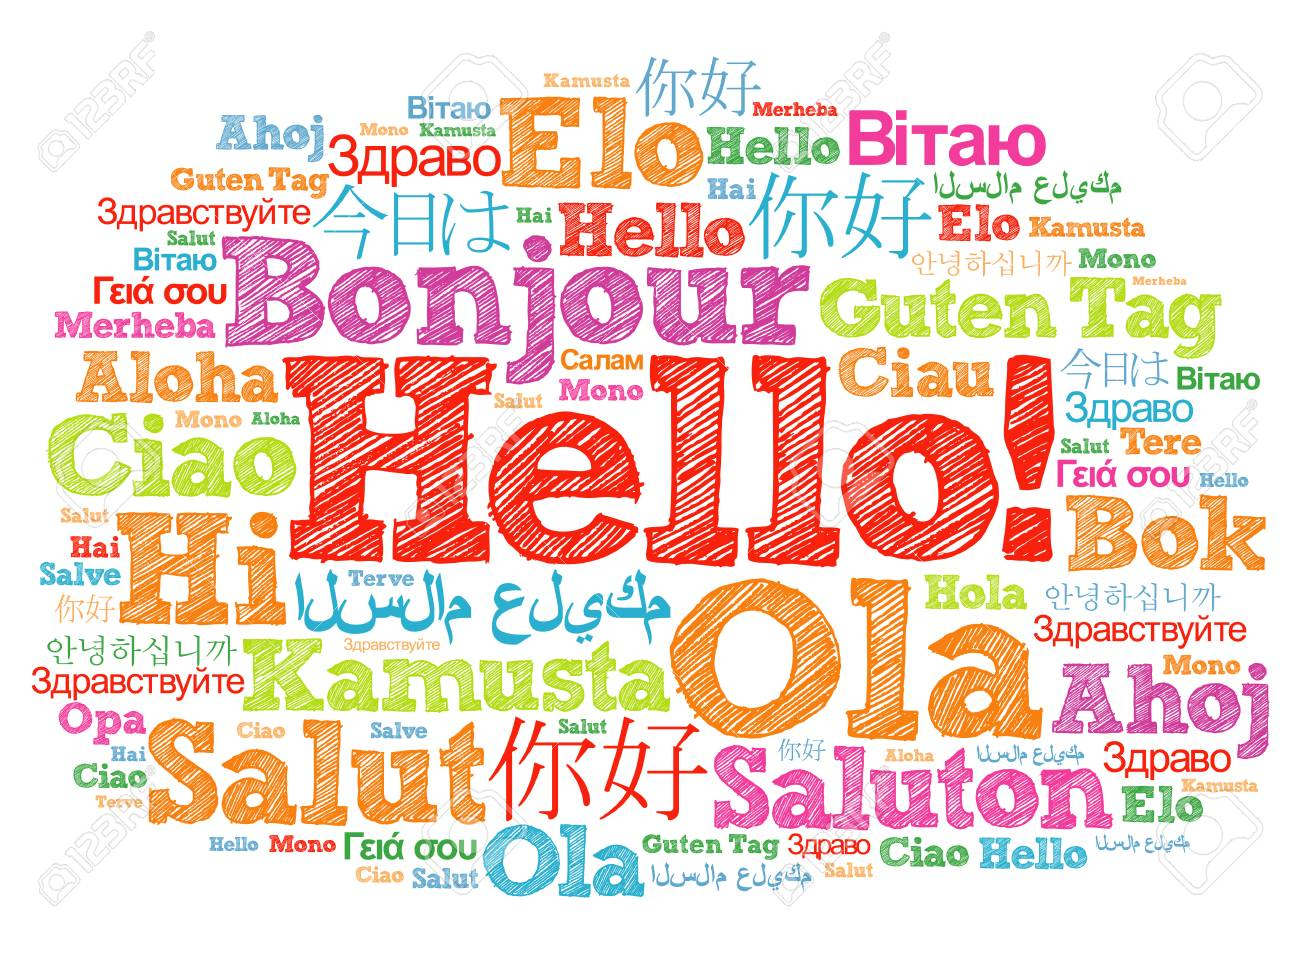

Ever wondered how languages are different?

What features can be used to define certain characteristics of each spoken language?

In this notebook, I will try to answer these kinds of questions. To aid my exploration of whether some languages are more efficient at conveying information than others, I have will be running on my analysis on two main data sets, namely: `languages.csv` and `spoken-texts.csv`. These data sets were published as part of a study in Science Advances in 2019 and made publicly available in their online repository. You can read about this research [here](https://www.science.org/doi/10.1126/sciadv.aaw2594) and [here](https://www.economist.com/graphic-detail/2019/09/28/why-are-some-languages-spoken-faster-than-others).

The scientists have compiled two tables, one with general information on the languages we are studying and one with experimental data where they recorded people speaking a certain text in different languages and noted down how fast they spoke, etc.

Below is a general overview of each data set and related columns.

<center><h3>Languages dataset</h4></center>

| Column              | Description                                       |
|---------------------|---------------------------------------------------|
| iso_lang            | ISO_639-3 language code                           |
| language            | Language name                                     |
| information density | Bits of information per syllable in the language  |
| distinct_syllables  | The number of different syllables in the language |
| continent           | The continent where the language is spoken        |


<center><h3>Spoken texts dataset</h4></center>

| Column    | Description                                     |
|-----------|-------------------------------------------------|
| speaker   | Speaker ID                                      |
| iso_lang  | ISO_639-3 language code                         |
| text      | Text ID                                         |
| sex       | The sex of the speaker                          |
| duration  | The number of seconds it took to speak the text |
| syllables | Number of syllables uttered during the speech   |
| age       | The age of the speaker                          |


In [ ]:
# Necessary imports

import pandas as pd
import altair as alt

### 1- Reading in the data

Let's first take a look at the languages data set.

In [ ]:
# Reading in the data 
languages = pd.read_csv("../input/languages-dataset/languages.csv")
languages

We can see that above data set has information on 17 languages and some of their attributes.

### 2- Language Exploration

First let's get familiar with potential differences and similarities between the languages in this data set. Clearly a language's `information density` is going to be important in how quick a speaker can convey information. But, a question to ask is if the `number of distinct syllabus` would matter. 

Let's see if we can see any patterns by organizing the languages by these two variables.

I will go ahead and create a scatterplot of the `information density` of each language versus its `number of distinct syllabus`.

In [ ]:
# Plotting scatter plots for information_density vs distinct_syllables
languages_plot_1 = alt.Chart(languages, title="Information density vs Syllables").mark_circle().encode(
    x=alt.X('information_density', scale= alt.Scale(domain=(4.5,8.2)), title='Information Density'),
    y= alt.Y('distinct_syllables', scale= alt.Scale(domain=(500,7050)), title='Distinct Syllables'),
    color='continent',
    tooltip=['language']
)
            
combined1 = (languages_plot_1 + languages_plot_1.transform_loess('information_density', 'distinct_syllables', groupby=['continent'], bandwidth=0.9).mark_line(size=3))

 # For annotation purpose
text1 = alt.Chart(languages.query('language == "French"')).mark_text(dx=0, dy=-10, color='black', fontSize=10).encode(
        x='information_density',
        y="distinct_syllables",
        text=alt.value('French')
    )
text2 = alt.Chart(languages.query('language == "Mandarin"')).mark_text(dx=0, dy=-10, color='black', fontSize=10).encode(
        x='information_density',
        y="distinct_syllables",
        text=alt.value('Mandarin')
    )
final_plot_1 = combined1 + text1 + text2
final_plot_1

We can see that the data appears to cluster in groups in the scatter plot. This clustering is labeled by the continent these languages come from which makes sense.

So, we can observe a similar trend that explains `information density` vs `number of distinct syllabus` for **Asian** and **European** languages.

The fun fact is the fact that both **French** and **Mandarian** are black sheep in their herd.

### 3- Speech Rate and Information Density

The two variables that directly determine the information rate of a language are its `information density` (bits of information per syllable) and the rate at which it is spoken (`syllables per second`). A high value in both would indicate a high information rate and efficient communication (a higher number of information bits conveyed per second).

I now use the `Spoken texts` data set to approximate the speech rate (syllables per second) of each language.

In [ ]:
# Reading in the data in Python
spoken_texts = pd.read_csv("../input/text-dataset/spoken-texts.csv")
spoken_texts

This data set has around 2.3k observations of a text in a particular language being read by a reader.

Let's calculate the average speech rate per language. I will create a new column, `speech_rate`, in the languages data set that holds these average values.

In [ ]:
# Calculating the average speech rate per language
spoken_texts["speech_rate"] = spoken_texts["syllables"] / spoken_texts["duration"]
# spoken_texts

# Creating a new column, speech_rate
languages_new = languages.merge(spoken_texts.groupby("iso_lang").mean(), how = "left", left_on = "iso_lang", right_on="iso_lang")
languages_new

Now I create another scatter plot of the `information density` versus the `speech rate` for the new languages data set.

In [ ]:
# Plotting scatter plot of the information density versus the speech rate 
languages_new_plot_1 = alt.Chart(languages_new, title="Information density vs Speech rate").mark_circle().encode(
    x=alt.X('information_density', scale= alt.Scale(zero=False), title='Information Density'),
    y= alt.Y('speech_rate', scale= alt.Scale(zero=False), title='Speech Rate'),
    color='continent',
    tooltip=['language']
)

combined2 = (languages_new_plot_1 + languages_new_plot_1.transform_loess(
    'information_density', 'speech_rate', 
    groupby=['continent'], bandwidth=0.9).mark_line(size=3))

# For annotation purpose
text1 = alt.Chart(languages_new.query('language == "French"')).mark_text(dx=0, dy=-10, color='black', fontSize=10).encode(
        x='information_density',
        y="speech_rate",
        text=alt.value('French')
    )
text2 = alt.Chart(languages_new.query('language == "Mandarin"')).mark_text(dx=0, dy=-10, color='black', fontSize=10).encode(
        x='information_density',
        y="speech_rate",
        text=alt.value('Mandarin')
    )

final_plot_2 = combined2 + text1 + text2
final_plot_2

It looks like we do not have a language that is high both in `information_density` and `speech_rate`, which could indicate that human minds are not good at processing auditory information beyond a certain rate limit.

### 4- Languages Information Rate

Now, let’s directly plot the rate at which information is conveyed for all the languages to see if there are at least small differences between them. For that, I will combine the appropriate columns to create a new column, `information_rate`, which holds the amount of information per second conveyed by each speaker and plot this for each language.

In [ ]:
# Merging spoken_texts and language_new df and adding a new column
merged_df = spoken_texts.merge(languages_new[['iso_lang', 'information_density', 'continent']], on='iso_lang')
merged_df['information_rate'] = merged_df['information_density'] * merged_df['syllables'] / merged_df['duration']
ordered_merged_df = merged_df.groupby('iso_lang')['information_rate'].mean().sort_values().index.tolist()
merged_df

In [ ]:
# Creating a plot for iso_lang vs information_rate with error bars and confidence intervals
merged_plot = alt.Chart(merged_df).mark_tick(opacity = 0.5).encode(
    alt.X('information_rate', scale = alt.Scale(zero = False)),
    alt.Y('iso_lang', scale = alt.Scale(zero = False), sort=ordered_merged_df),
    color = alt.Color('continent')
)
err_bars = alt.Chart(merged_df, title="Information rate vs Language").mark_errorbar(extent = "ci", rule=alt.LineConfig(size=2), color = 'black').encode(
    alt.X('information_rate', scale=alt.Scale(zero = False), title="Information Rate"),
    alt.Y('iso_lang', scale=alt.Scale(zero = False), sort=ordered_merged_df, title="ISO Language"))

final_plot_3 = merged_plot + err_bars + merged_plot.encode(x='mean(information_rate)').mark_point(stroke='black', size=10)
final_plot_3

### Conclusions

- In an aim to investigate the potential differences and similarities of languages, 17 different languages from two continents (Asia and Europe) were studied. In the first step, I decided to evaluate the relatioshship between the `information_density` (bits of information per syllable) and the number of distinct syllabus for each language. Results proved that firstly as expeted the higher the `number of distinct syllabus`, the greater the `information_density` is. Secondly, the data for Asian languages cluster close to each other. Same story goes with European languages. Of course some outliers like **French** and **Mandarin** were also observed.

- In the second step, I studied the relationship between `information_density` (bits of information per syllable) and `speech_rate` (syllables per second, which is technically equal to number of syllables per duration) for the languages. Given the fact that a high value in both `information_density` and `speech_rate` would indicate a high information rate and efficient communication (a higher number of information bits conveyed per second), the reciprocal nature of these two variables confirmed the fact that we do not have a language that is high both in `information_density` and `speech_rate`, proving that human minds are not good at processing auditory information beyond a certain rate limit.

- In the final step, I decided to plot the rate at which information is conveyed (`information_rate`) for all the languages to see if there are at least small differences between them. Results show that the difference between the languages are not that significant. **Thai** is standing at one extreme with the lowest `information_rate` whereas **French** is on the other extreme with the highest `information_rate` among all languages. Leaving us with the very important conclusion that if you don't know **French** yet, you 'd better find a good teacher as soon as possible.